In [ ]:
# download the Kaggle dataset instructions here:
# https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
cd  /content/gdrive/MyDrive/Kaggle/PlantVillage_Sorted


/content/gdrive/.shortcut-targets-by-id/1AE_ah6OZ6tuGxdM5Y8ousz-lKzgRa6TZ/Kaggle/PlantVillage_Sorted


In [ ]:
!ls

development  logs  test  test_model.h5


In [ ]:
import random as random
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from sklearn import preprocessing
import cv2
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
print(os.getcwd())
data_dir=r'/content/gdrive/My Drive/Kaggle/PlantVillage_Sorted/'
general_data_dir=r'/content/gdrive/My Drive/General_Validation_Datasets/'

/content/gdrive/.shortcut-targets-by-id/1AE_ah6OZ6tuGxdM5Y8ousz-lKzgRa6TZ/Kaggle/PlantVillage_Sorted


In [ ]:
seed = 909 # (IMPORTANT) to input image and corresponding target with same augmentation parameter.
# notice that i split the gen_params into 20% val 80% train 
dev_params = { "validation_split":0.2, "rescale":1.0/255,"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}

train_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**dev_params) 
val_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**dev_params) 

# use classes tag to only specify a certain class 
train_generator = train_image_datagen.flow_from_directory(data_dir+'development', subset = 'training', classes = ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot'],
                                                     batch_size = 32,seed=seed, color_mode='rgb',shuffle = True)
val_generator = val_image_datagen.flow_from_directory(data_dir+'development', subset = 'validation', classes = ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot'],
                                                     batch_size = 32,seed=seed, color_mode='rgb',shuffle = True)


# CREATE THE TEST GENERATOR HERE
test_dir = data_dir+'test' # This is the test folder!!

test_params = {"rescale":1.0/255,"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}

test_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**test_params) 

# use classes tag to only specify a certain class in this case i am only using Pepper__bell class
test_generator = train_image_datagen.flow_from_directory(test_dir, classes = ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot'],
                                                         batch_size = 32,seed=seed, color_mode='rgb',shuffle = True)

# CREATE THE GENERAL TEST GENERATOR HERE

general_test_params = {"rescale":1.0/255,"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}

general_test_image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**test_params) 

# use classes tag to only specify a certain class in this case i am only using Pepper__bell class
general_test_generator = train_image_datagen.flow_from_directory(general_data_dir, classes = ['Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Septoria_leaf_spot', 'Tomato_Leaf_Mold', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Early_blight', 'Tomato_Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Target_Spot'],
                                                         batch_size = 32,seed=seed, color_mode='rgb',shuffle = True)

Found 10246 images belonging to 10 classes.
Found 2558 images belonging to 10 classes.
Found 3207 images belonging to 10 classes.
Found 0 images belonging to 10 classes.


In [ ]:
# I want to see the labels, lets access the keys in the dictionary
# https://stackoverflow.com/questions/48373685/keras-imagedatagenerator-how-to-get-all-labels-from-data
# train_generator.class_indices.keys()
# train_generator.class_indices.values()

for key, val in train_generator.class_indices.items(): # see the classes
  print(key, val)

# heres the labels, are they one hot encoded? No, and they dont have to be see Q's above
x= train_generator.next()
train_generator.labels

Tomato_Spider_mites_Two_spotted_spider_mite 0
Tomato_Septoria_leaf_spot 1
Tomato_Leaf_Mold 2
Tomato_Late_blight 3
Tomato_healthy 4
Tomato_Early_blight 5
Tomato_Bacterial_spot 6
Tomato__Tomato_YellowLeaf__Curl_Virus 7
Tomato__Tomato_mosaic_virus 8
Tomato__Target_Spot 9


array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

(32, 256, 256, 3)


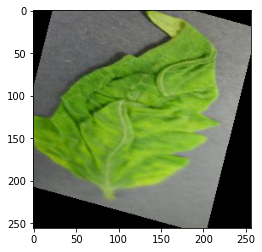

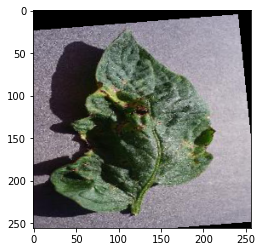

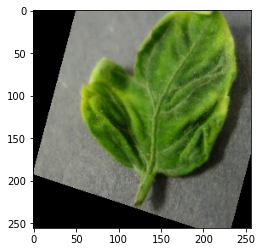

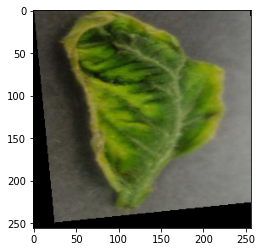

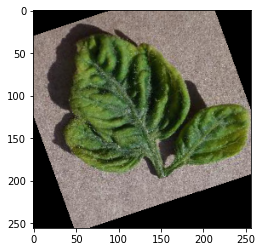

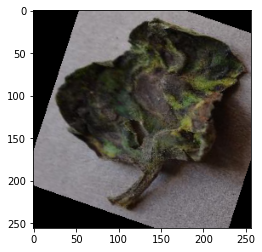

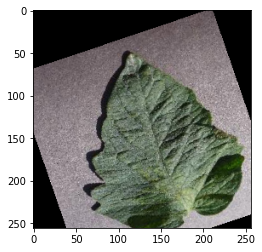

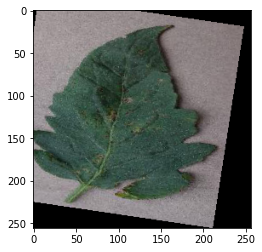

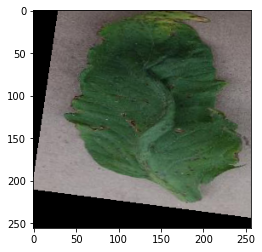

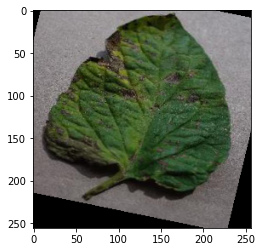

In [ ]:
# from https://stackoverflow.com/questions/59217031/plot-images-from-image-generator
x= train_generator.next()
for i in range(0,1):
    image = x[i]
    print(image.shape) # (32, 250, 250, 3) this means theres 32 images per batch (batch, img_width, img_length, RGB)
    # since theres 32 images per batch lets use a for loop to display just the first 2 images
    for img in range(0,10):
      plt.imshow(image[img])
      plt.show()

In [ ]:
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.layers.normalization import BatchNormalization
from keras.layers import Input, GlobalAveragePooling2D, concatenate
from keras import models
from keras.models import Model

In [ ]:
def my_model_cnn(ishape = (256,256,3), k = 10, lr = 1e-1): # k = number of classes

    # ishape is the size of the images we have, which is 32 by 32 by 3 channels 
    # k = 10 is number of classes 
    # lr is the learning rate 
    
    model_input = tf.keras.layers.Input(shape = ishape) # Input layer, 0 parameters

    l1 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu')(l1)
    l2_mp = tf.keras.layers.MaxPooling2D((2,2))(l2)
    l2_dp = tf.keras.layers.Dropout(0.3)(l2_mp)
    l2_bn = tf.keras.layers.BatchNormalization()(l2_dp)

    l3 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l2_bn)
    l4 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu')(l3)
    l4_mp = tf.keras.layers.MaxPooling2D((2,2))(l4)
    l4_dp = tf.keras.layers.Dropout(0.3)(l4_mp)
    l4_bn = tf.keras.layers.BatchNormalization()(l4_dp)

    l5 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(l4_bn)
    l6 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu')(l5)
    l6_mp = tf.keras.layers.MaxPooling2D((2,2))(l6)
    l6_dp = tf.keras.layers.Dropout(0.3)(l6_mp)
    l6_bn = tf.keras.layers.BatchNormalization()(l6_dp)

    flat = tf.keras.layers.Flatten()(l6_bn) 
    out1 = tf.keras.layers.Dense(k,activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out1)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics = ["accuracy"])
    return model

model = my_model_cnn()
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496 

In [ ]:
# define your callbacks
# remember that you need to save the weights of your best model!
model_name = "test_model"
model_name_cnn = "test_model.h5"

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 40)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name_cnn, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [ ]:
# train your model - decide for how many epochs
%load_ext tensorboard
import datetime
# used to clear previous logs on tensor board. 
! rm -rf ./logs/

In [ ]:
log_dir = "logs/fit_cnn/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_generator,batch_size = 32, epochs = 100, verbose = 1, callbacks= [early_stop, monitor, lr_schedule, tensorboard_callback],validation_data= val_generator)

Epoch 1/100
321/321 [==============================] - ETA: 0s - loss: 74.0755 - accuracy: 0.2651 